In [1]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm

In [12]:
class World:
    def __init__(self,debug = False):
        self.objects = []
        self.debug = debug
        
    def append(self,obj):
        self.objects.append(obj)# world座標系にobjを入れる
        
    def draw(self):
        fig = plt.figure(figsize = (4,4))# 8*8インチの図を用意 図を描くのに必要
        ax = fig.add_subplot(111) # サブプロット １行１列の１番目を作るという宣言
        ax.set_aspect('equal') # 縦横比を座標の値と揃える
        ax.set_xlim(-5,5) # x軸 -5m~5m
        ax.set_ylim(-5,5) # y軸 -5m~5m
        ax.set_xlabel("X",fontsize = 10) #ラベル
        ax.set_ylabel("Y",fontsize = 10)
        
        elems = []
        
        if self.debug:
            for i in range(1000):self.one_step(i,elems,ax) # デバッグ時にアニメーションをさせない
        else:
            self.ani = anm.FuncAnimation(fig,self.one_step,fargs = (elems,ax),
                                         frames = 10,interval = 1000,repeat = False)
            plt.show()
        
    def one_step(self,i,elems,ax):
        while elems: elems.pop().remove() # 二重で描かれないように
        elems.append(ax.text(-4.4,4.5,"t = "+str(i),fontsize = 10))
        for obj in self.objects:
            obj.draw(ax,elems)

In [13]:
class IdealRobot:
    def __init__(self,pose,color = "black"):
        self.pose = pose
        self.r = 0.2
        self.color = color
    # r:ロボットの半径
    def draw(self,ax,elems):
        x,y,theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn],[y,yn],color = self.color)
        c = patches.Circle(xy = (x,y),radius = self.r,fill = False,color = self.color)
        elems.append(ax.add_patch(c))

<IPython.core.display.Javascript object>


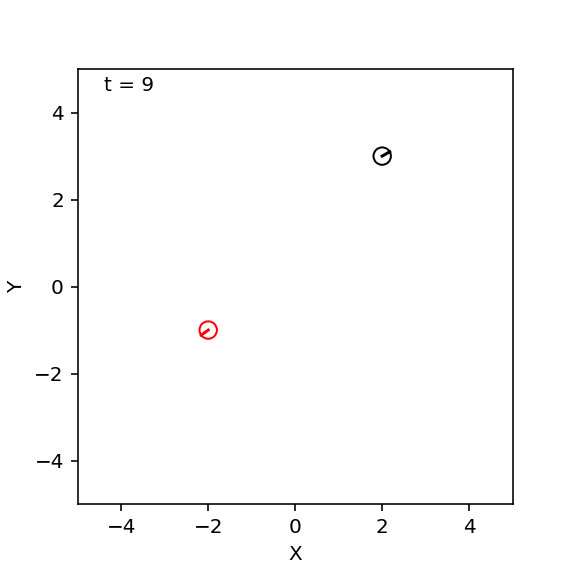

In [14]:
world = World()
robot1 = IdealRobot(np.array([2,3,math.pi/6]).T) #(x,y,θ) = (2,3,π/6) .T -> 転置
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]).T,"red")
world.append(robot1)
world.append(robot2)
world.draw()